In [1]:
import yfinance as yf
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

# Importation des données

In [2]:
Data=pd.read_csv('Data_Memoire.csv',index_col=False)
Data["Date"]=Data["Date"].apply(lambda x:str(x))
Data["Date"]=pd.to_datetime(Data["Date"],format="%Y/%m/%d")
Data

,Date,Cardano,Bitcoin Cash,Binance Coin,Bitcoin,Dogecoin,Ethereum,Chainlink,Litecoin,Decentraland,...,Volatilité,Liquidité,SP500,VIX,Euro Stoxx 50,CAC40,Or,Silver,Crude Oil,Treasury Yield
0,2018-01-04,0.031917,-0.068429,-0.033756,0.026196,0.034764,0.018907,0.445120,-0.016294,0.283111,...,-0.178876,-0.155731,0.004029,0.007650,0.016810,0.015458,0.002431,0.000233,0.006166,0.02453
1,2018-01-05,-0.102826,0.063493,0.618973,0.117333,0.261613,0.017125,-0.078103,0.032734,-0.172518,...,-0.062825,-0.075340,0.007034,0.000000,0.010858,0.010540,0.000682,0.000931,-0.009192,0.02476
2,2018-01-06,0.027603,0.078225,0.525742,0.005594,0.221583,0.044061,0.171996,0.189284,0.105632,...,-0.091773,-0.153448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02476
3,2018-01-07,-0.018138,0.000083,-0.180274,-0.059873,0.149701,0.107029,0.194524,-0.026996,0.263753,...,-0.066906,-0.064475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02476
4,2018-01-08,-0.108593,-0.131118,-0.021220,-0.079350,-0.119558,-0.004024,0.084096,-0.113323,-0.001440,...,0.041306,-0.065476,0.001662,0.032538,0.002445,0.003047,-0.001288,-0.008195,0.004720,0.02480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,2022-04-21,-0.028663,-0.044882,-0.031870,-0.020472,-0.032035,-0.029328,-0.031039,-0.044488,-0.036738,...,0.001568,0.004656,-0.014753,0.116142,0.008012,0.013614,-0.003790,-0.025683,0.010122,0.02917
1569,2022-04-22,-0.003646,0.016103,0.004854,-0.019420,0.000220,-0.007580,0.001517,-0.013060,0.005447,...,0.002602,-0.008837,-0.027740,0.243827,-0.022408,-0.019907,-0.007147,-0.014784,-0.016572,0.02906
1570,2022-04-23,-0.020560,-0.023430,-0.013109,-0.006381,-0.015792,-0.009013,-0.019518,-0.000911,-0.013205,...,0.008313,0.007151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02906
1571,2022-04-24,-0.002423,-0.016937,-0.006342,-0.000442,-0.017089,-0.005235,-0.004219,-0.008358,-0.005101,...,0.007090,-0.000219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02906


# I. Visualisation et Analyse des données

## A. Analyse Targets

#### Graphique Bitcoin

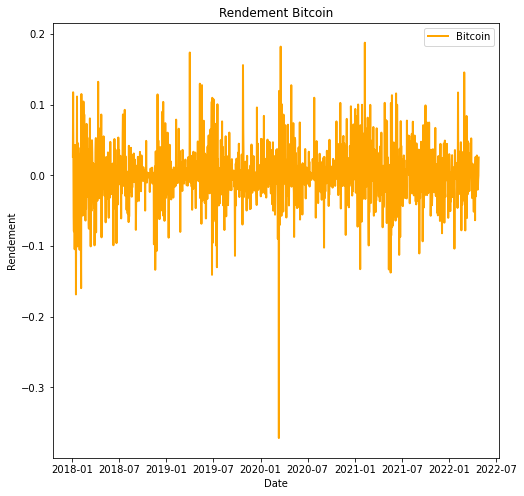

In [3]:
plt.figure(figsize=(8,8))
plt.plot(Data["Date"],Data["Bitcoin"],label="Bitcoin",lw=2,c="orange")
plt.title("Rendement Bitcoin")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.show()

#### Graphique Ethereum

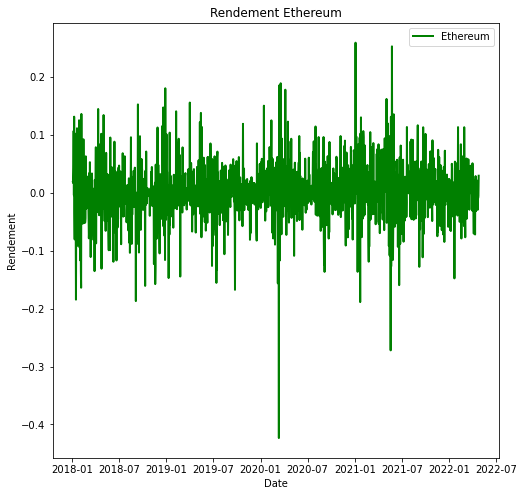

In [4]:
plt.figure(figsize=(8,8))
plt.plot(Data["Date"],Data["Ethereum"],label="Ethereum",lw=2,c="green")
plt.title("Rendement Ethereum")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.show()

#### Stats Bitcoin et Ethereum

In [5]:
pd.options.display.float_format = '{:.4f}'.format
Data[["Bitcoin","Ethereum"]].describe()

,Bitcoin,Ethereum
count,1573.0000,1573.0000
mean,0.0014,0.0020
std,0.0391,0.0502
min,-0.3717,-0.4235
25%,-0.0158,-0.0214
50%,0.0014,0.0010
75%,0.0180,0.0272
max,0.1875,0.2595


## B. Analyse Relation Target / Facteurs

In [6]:
def GraphiqueRelations(nom_target,nom_facteur,color):
    plt.figure(figsize=(6,6))
    plt.scatter(Data[nom_facteur],Data[nom_target],alpha=0.5, c=color)
    plt.title('Graphique rendement du %s' %nom_target)
    plt.grid()
    plt.legend()
    plt.xlabel(nom_facteur)
    plt.ylabel(nom_target)
    plt.axis('tight')
    plt.show()

#### Relation Bitcoin / Indice Marché Crypto

No handles with labels found to put in legend.


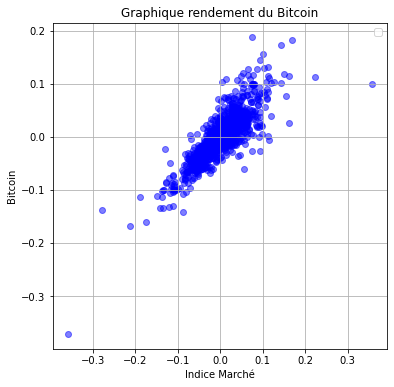

In [7]:
GraphiqueRelations("Bitcoin","Indice Marché","blue")

#### Relation Bitcoin / Size

No handles with labels found to put in legend.


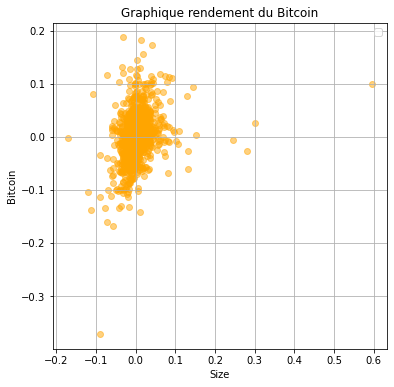

In [8]:
GraphiqueRelations("Bitcoin","Size","orange")

#### Relation Bitcoin / Momentum

No handles with labels found to put in legend.


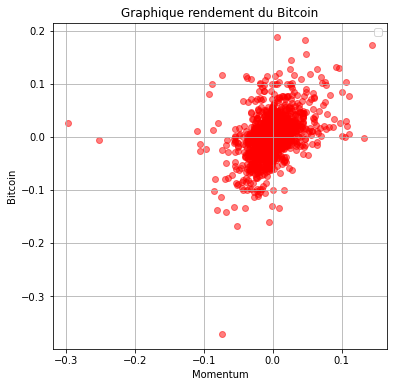

In [9]:
GraphiqueRelations("Bitcoin","Momentum","red")

#### Relation Bitcoin / Volatilité

No handles with labels found to put in legend.


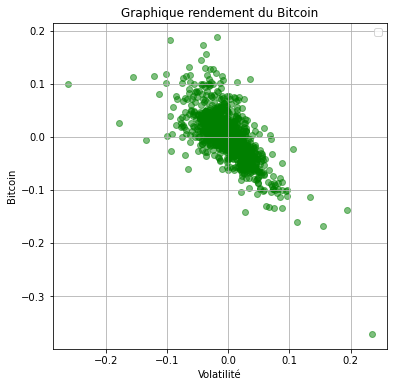

In [10]:
GraphiqueRelations("Bitcoin","Volatilité","green")

#### Relation Bitcoin / Liquidité

No handles with labels found to put in legend.


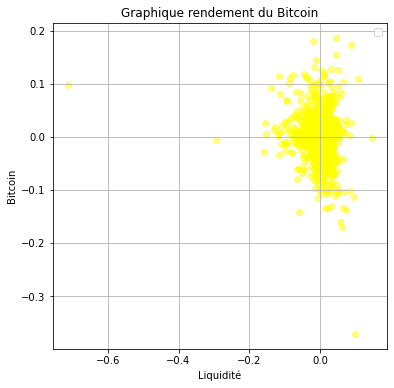

In [11]:
GraphiqueRelations("Bitcoin","Liquidité","yellow")

#### Relation Bitcoin / VIX

No handles with labels found to put in legend.


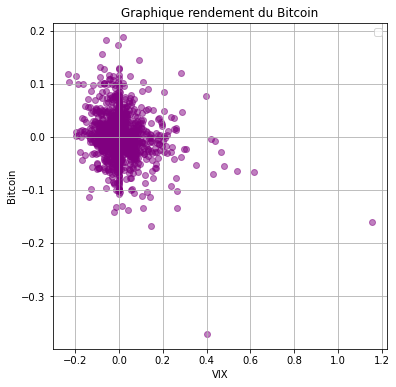

In [12]:
GraphiqueRelations("Bitcoin","VIX","purple")

##### Relation Bitcoin / SP500, CAC40, Euro Stoxx 50

No handles with labels found to put in legend.


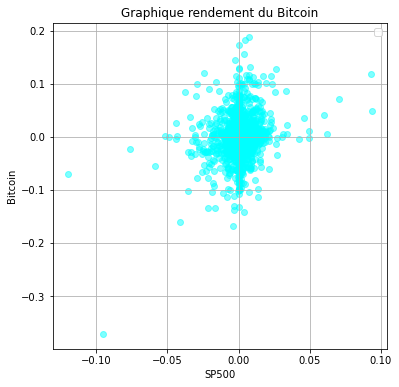

No handles with labels found to put in legend.


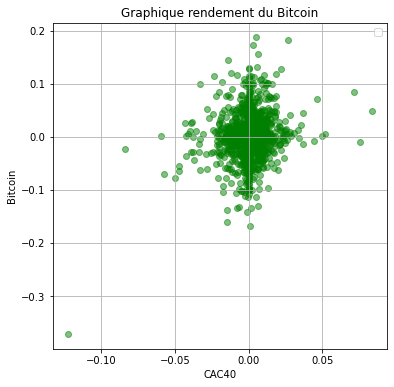

No handles with labels found to put in legend.


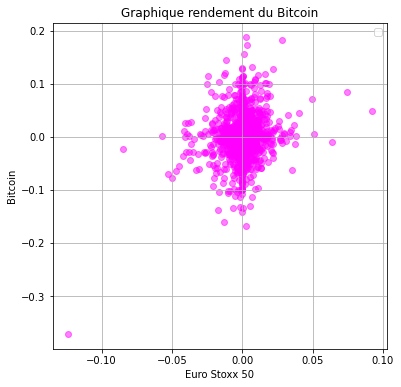

In [13]:
GraphiqueRelations("Bitcoin","SP500","cyan")
GraphiqueRelations("Bitcoin","CAC40","green")
GraphiqueRelations("Bitcoin","Euro Stoxx 50","magenta")

#### Relation Bitcoin / Or, Argent, Pétrole

No handles with labels found to put in legend.


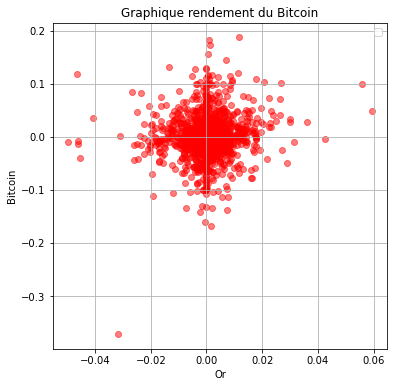

No handles with labels found to put in legend.


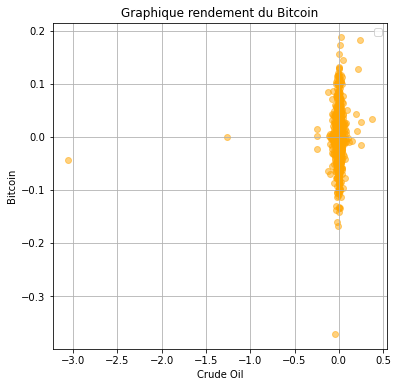

In [14]:
GraphiqueRelations("Bitcoin","Or","red")
GraphiqueRelations("Bitcoin","Crude Oil","orange")

#### Relation Bitcoin /Treasury yield Index

No handles with labels found to put in legend.


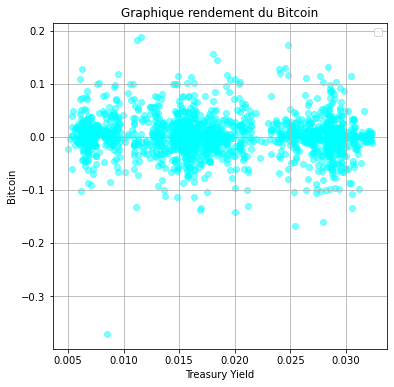

In [15]:
GraphiqueRelations("Bitcoin","Treasury Yield","cyan")

## C. Corrélation des varaibles

In [16]:
def affichageCorr(Data):
    cor=Data.corr()
    plt.figure(figsize=(25, 25))
    sn.heatmap(cor, annot=True)
    plt.show()

In [17]:
columns=["Bitcoin","Indice Marché","Size","Momentum","Volatilité","Liquidité","SP500","CAC40","Euro Stoxx 50","Or","Silver","Crude Oil","Treasury Yield","VIX","Ethereum"]

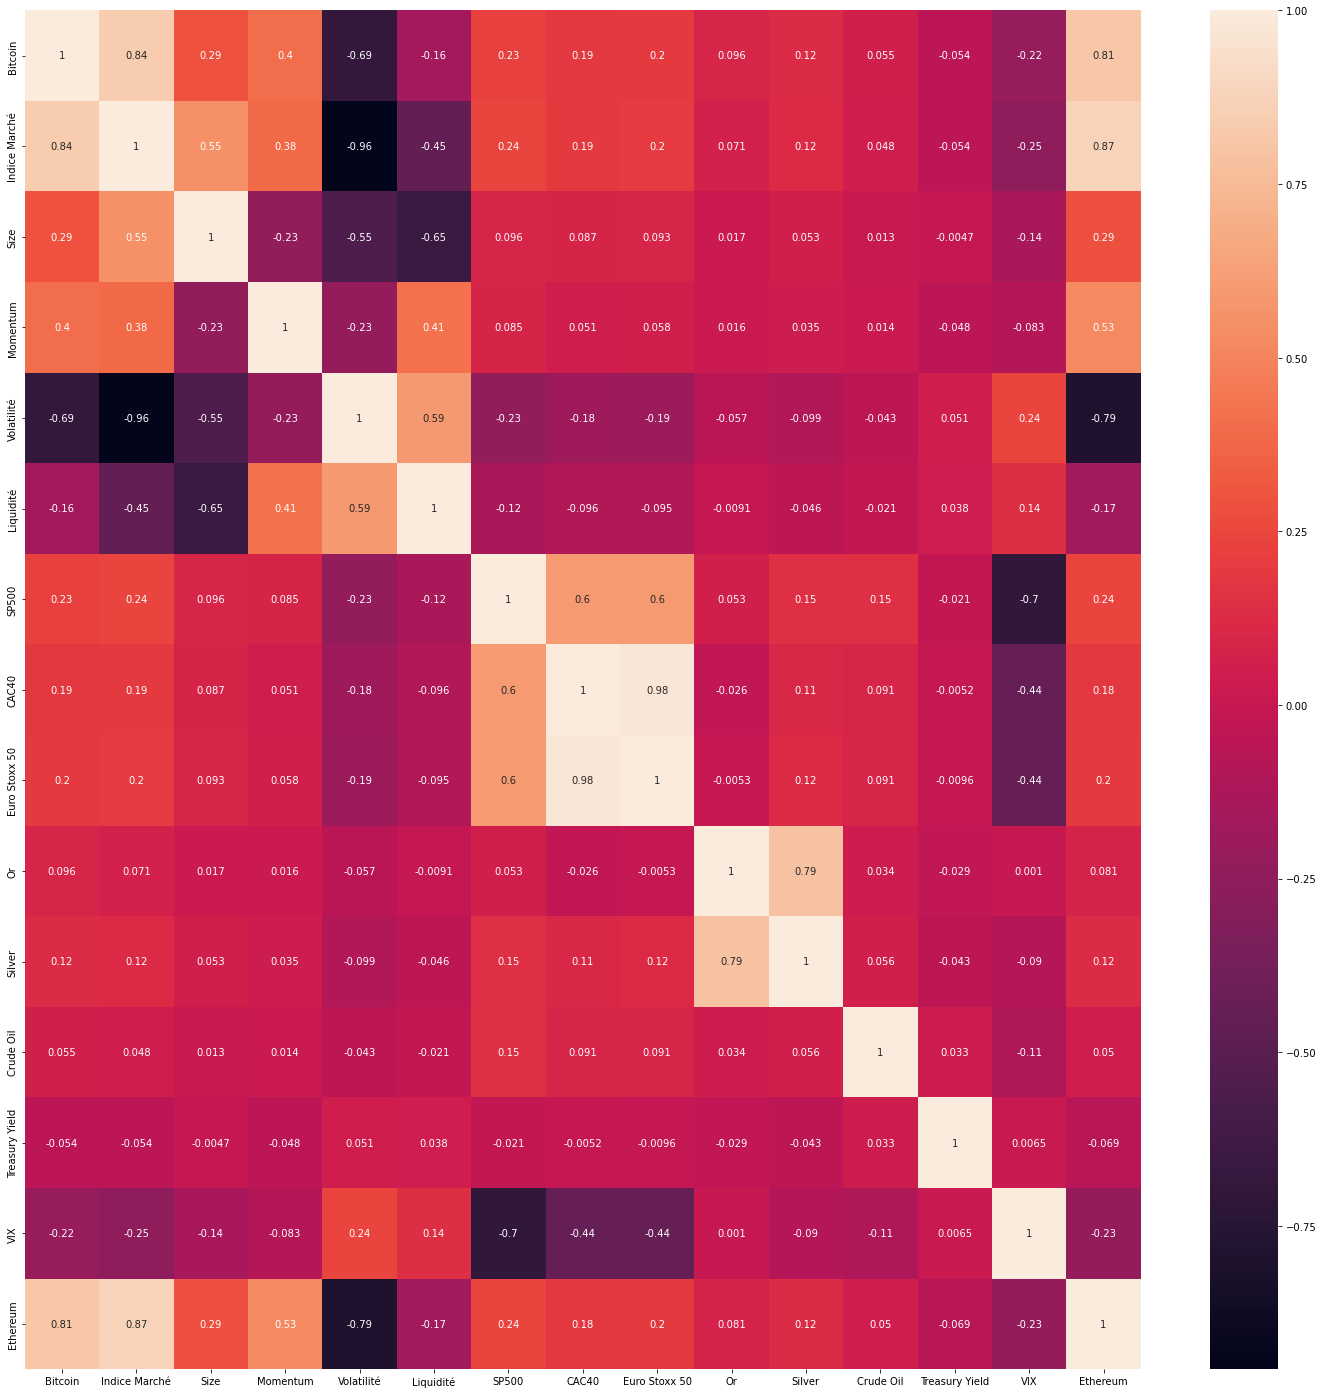

None


In [18]:
print(affichageCorr(Data[columns]))

In [19]:
DataSet=Data[columns]
DataSet

,Bitcoin,Indice Marché,Size,Momentum,Volatilité,Liquidité,SP500,CAC40,Euro Stoxx 50,Or,Silver,Crude Oil,Treasury Yield,VIX,Ethereum
0,0.0262,0.1614,0.3021,-0.2971,-0.1789,-0.1557,0.0040,0.0155,0.0168,0.0024,0.0002,0.0062,0.0245,0.0077,0.0189
1,0.1173,0.0640,-0.0721,-0.0739,-0.0628,-0.0753,0.0070,0.0105,0.0109,0.0007,0.0009,-0.0092,0.0248,0.0000,0.0171
2,0.0056,0.0990,-0.0115,-0.0166,-0.0918,-0.1534,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0248,0.0000,0.0441
3,-0.0599,0.0547,0.1317,-0.0367,-0.0669,-0.0645,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0248,0.0000,0.1070
4,-0.0794,-0.0832,-0.0070,-0.0836,0.0413,-0.0655,0.0017,0.0030,0.0024,-0.0013,-0.0082,0.0047,0.0248,0.0325,-0.0040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,-0.0205,-0.0153,0.0145,-0.0370,0.0016,0.0047,-0.0148,0.0136,0.0080,-0.0038,-0.0257,0.0101,0.0292,0.1161,-0.0293
1569,-0.0194,-0.0083,-0.0017,0.0049,0.0026,-0.0088,-0.0277,-0.0199,-0.0224,-0.0071,-0.0148,-0.0166,0.0291,0.2438,-0.0076
1570,-0.0064,-0.0104,0.0008,-0.0079,0.0083,0.0072,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0291,0.0000,-0.0090
1571,-0.0004,-0.0090,-0.0089,-0.0013,0.0071,-0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0291,0.0000,-0.0052


# II. Construction des modeles

## A. Procedure d'evaluation

* Separation en train, validation et test set pour la visualisation des data set

In [20]:
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

#Séparation 
trainset=DataSet.loc[:int(len(DataSet.index)*0.6),:]
valset=DataSet.loc[int(len(DataSet.index)*0.6)+1:int(len(DataSet.index)*0.8),:]
testset=DataSet.loc[int(len(DataSet.index)*0.8)+1:,:]


* Fonction d'évaluation

In [21]:
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve


def evaluationML(Data,crypto,model,Test,Constru,Affiche,Graph):
    """
    Cette fonction va pour un modele de machine learning, une crypto procéder à la mise en forme de la data puis entrainer 
    le modèle avant d'effectuer les predictions. Si on veut effectuer des predictions sur le test set on met l'argument
    Test a True.
    
    L'argument Constru est a mettre a True quand on veut construire un modele ou la variable Target n'est pas une crypto
    mais une crypto avec le taux sans risque (pour le modele multi factoriel et le CAPM).
    
    L'argument Affiche permet d'afficher l'ensemble des statisques sur les predictions réalisées s'il est initialisé à
    True.
    
    Graph permet d'afficher les graphiques qui permettent de comparer les predictions du modèle au cours réel de la crypto
    sélectionné. Pour l'afficher il faut que l'argument Test soit initialisé à True
    
    
    
    """

    #separation du data en train,validation et test set
    trainset=Data.loc[:int(len(Data.index)*0.7),:]
    valset=Data.loc[int(len(Data.index)*0.7)+1:int(len(Data.index)*0.85),:]
    testset=Data.loc[int(len(Data.index)*0.85)+1:,:]
    
    #separation de chaque data en matrice de variables explicatives et target
    X_train,Y_train=Sep(trainset,crypto,Constru)
    X_val,Y_val=Sep(valset,crypto,Constru)
    X_test,Y_test=Sep(testset,crypto,Constru)
    
    #entrainement du modèle
    model.fit(X_train,Y_train)
    if Test==True : y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    y_pred_val=model.predict(X_val)
    
    #graphiques
    if Graph==True :
        if crypto=='Bitcoin':
            GraphiqueCours(Data,14982.099609,crypto,y_pred_train,y_pred_val,y_pred_test)
        elif crypto=='Ethereum':
            GraphiqueCours(Data,884.443970,crypto,y_pred_train,y_pred_val,y_pred_test)

    #stats du modele et affichage
    if Affiche==True : print('Stats Train')
    lst_train=TableauStatsPerf(Y_train,y_pred_train,Affiche)
    if Affiche==True : print('Stats val')
    lst_val=TableauStatsPerf(Y_val,y_pred_val,Affiche)
    if Affiche==True & Test==True: print('Stats Test')
    if Test==True: lst_set=TableauStatsPerf(Y_test,y_pred_test,Affiche)

    if Test==True:
        return lst_val,lst_set
    else:
        return lst_val
        
    

    
    
def Sep(Data,crypto,Constru):
    """
    Fonction qui sépare un Data en matrice de variables explicatives et vecteur colonne de la variable expliquée
    
    Si constru=True la variable expliquée sera la Target (CAPM,multi facto) et non la crypto
    """
    if Constru==False:
        lst=['Bitcoin','Ethereum']
        if crypto==lst[0]:
            Data=Data.drop(lst[1],axis=1)
        else:
            Data=Data.drop(lst[0],axis=1)
        
    
    X=Data.drop(crypto,axis=1);
    Y=Data[crypto]
    
    
    return X,Y  

def TableauStatsPerf(y_test,y_pred,Affiche):
    """
    Fonction qui clacule les statistiques de prediction et les affiche si Affiche=True
    """
    dico={'RMSE (%)':round(np.sqrt(mean_squared_error(y_test,y_pred))*100,5),
     'MAE (%)':round(mean_absolute_error(y_test,y_pred)*100,5),
     'MSE (%)':round(mean_squared_error(y_test,y_pred)*100,5),
     'R2':round(r2_score(y_test,y_pred),5)
    }
    
    if Affiche==True:    
        print("La performance du modèle")


        print(dico)
    
    lst=[value for (k,value) in dico.items()]
    
    return lst

def GraphiqueCours(Data,Base,crypto,y_pred_train,y_pred_val,y_pred_test):
    
    """
    Fonction qui affiche les graphiques des cours de la crypto avec les cours de prediction sur les 3 data.
    L'argument Base correspond au cours réel de la crypto avant le premier rendement.
    
    """
  
    #Calcul des cours réels de la crypto à partir de ses rendements
    Cours_reel_BTC=Data[crypto].copy()
    Cours_reel_BTC.iloc[0]=BTC_Base*(1+Cours_reel_BTC.iloc[0])

    for i in range(1,len(Data[crypto])):
        Cours_reel_BTC.iloc[i]=Cours_reel_BTC.iloc[i-1]*(1+Cours_reel_BTC.iloc[i])

    #Calcul des cours prédits sur le train_set de la crypto à partir de ses rendements
    Cours_pred_train=y_pred_train.copy()
    Cours_pred_train[0]=BTC_Base*(1+Cours_pred_train[0])
    for i in range(1,len(Cours_pred_train)):
        Cours_pred_train[i]=Cours_pred_train[i-1]*(1+Cours_pred_train[i])

    #Calcul des cours prédits sur le validation_set de la crypto à partir de ses rendements
    Cours_pred_val=y_pred_val.copy()
    Cours_pred_val[0]=Cours_pred_train[len(Cours_pred_train)-1]*(1+Cours_pred_val[0])
    for i in range(1,len(Cours_pred_val)):
        Cours_pred_val[i]=Cours_pred_val[i-1]*(1+Cours_pred_val[i])

   #Calcul des cours prédits sur le test_set de la crypto à partir de ses rendements
    Cours_pred_test=y_pred_test.copy()
    Cours_pred_test[0]=Cours_pred_val[len(Cours_pred_val)-1]*(1+Cours_pred_test[0])
    for i in range(1,len(Cours_pred_test)):
        Cours_pred_test[i]=Cours_pred_test[i-1]*(1+Cours_pred_test[i])

    #Separation des cours de la crypto en train,validation et test set
    train_set=Cours_reel_BTC.iloc[:int(len(Cours_reel_BTC.index)*0.7)]
    train_set.reset_index(inplace=True,drop=True)
    val_set=Cours_reel_BTC.iloc[int(len(Cours_reel_BTC.index)*0.7)+1:int(len(Cours_reel_BTC.index)*0.85)]
    val_set.reset_index(inplace=True,drop=True)
    test_set=Cours_reel_BTC.iloc[int(len(Cours_reel_BTC.index)*0.85)+1:]
    test_set.reset_index(inplace=True,drop=True)
   
    #Graphique train_set
    plt.figure(figsize=(20, 10))
    plt.plot(train_set, label='Cours reel %s'%crypto, linewidth=2)
    plt.plot(Cours_pred_train, label='prediction: train set', linewidth=2)
    plt.title('Cours rééls et cours prédits sur Train Set')
    plt.legend()
    
    plt.figure(figsize=(20, 10))
    plt.plot(val_set, label='Cours reel %s'%crypto, linewidth=2)
    plt.plot(Cours_pred_val, label='prediction: val set', linewidth=2)
    plt.title('Cours rééls et cours prédits validation Set')
    plt.legend()
    
    
    plt.figure(figsize=(20, 10))
    plt.plot(test_set, label='Cours reel %s'%crypto, linewidth=2)
    plt.plot(Cours_pred_test, label='prediction: test set', linewidth=2)
    plt.title('Cours rééls et cours prédits tes Set')
    plt.legend()



## A. Modele CAPM Classique

equation CAPM: r-taux_sansrique=Beta*(taux marché - taux_sans_risque)

In [22]:
#Fonction de Creation CAPM

from sklearn.linear_model import LinearRegression

def modelCAPM(crypto):
    DataCAPM=pd.DataFrame()
    DataCAPM['target']=DataSet[crypto]-DataSet['Treasury Yield']
    DataCAPM['facteur']=DataSet['Indice Marché']-DataSet['Treasury Yield']
    
    modelLR=LinearRegression()
    modelLR.fit_intercept=False #on veut pas la constante

    lst=evaluationML(DataCAPM,'target',modelLR,Test=True,Constru=True,Affiche=True,Graph=False)
    
    print('')
    print(modelLR.coef_)
   
    
    


In [23]:
#CAPM sur le Bitcoin
modelCAPM('Bitcoin')

Stats Train
La performance du modèle
{'RMSE (%)': 2.06271, 'MAE (%)': 1.43998, 'MSE (%)': 0.04255, 'R2': 0.73954}
Stats val
La performance du modèle
{'RMSE (%)': 3.10304, 'MAE (%)': 2.20511, 'MSE (%)': 0.09629, 'R2': 0.52466}
Stats Test
La performance du modèle
{'RMSE (%)': 1.74011, 'MAE (%)': 1.25846, 'MSE (%)': 0.03028, 'R2': 0.74062}

[0.8298393]


In [24]:
#CAPM sur Ethereum
modelCAPM('Ethereum')

Stats Train
La performance du modèle
{'RMSE (%)': 2.1908, 'MAE (%)': 1.4008, 'MSE (%)': 0.048, 'R2': 0.81688}
Stats val
La performance du modèle
{'RMSE (%)': 3.89538, 'MAE (%)': 2.4913, 'MSE (%)': 0.15174, 'R2': 0.58047}
Stats Test
La performance du modèle
{'RMSE (%)': 1.85732, 'MAE (%)': 1.29001, 'MSE (%)': 0.0345, 'R2': 0.78542}

[1.05343103]


## B. Modèle Multifactoriel du marché

equation modele multi facto: Rit–RFt = αi + bi(RMt–RF t) + siSMB + wiWML + giGMB + viV MS + eit

In [25]:
#Fonction creation modèle multi facto
def ModelMultiFacto(crypto):
    DataCAPM=pd.DataFrame()
    DataCAPM['target']=Data[crypto]-Data['Treasury Yield']
    DataCAPM['facteur']=Data['Indice Marché']-Data['Treasury Yield']
    DataCAPM=pd.concat([DataCAPM,Data[['Size','Momentum','Volatilité','Liquidité']]],axis=1,join="outer",ignore_index=False)
    
    modelLR=LinearRegression()
    modelLR.fit_intercept=True
    lst=evaluationML(DataCAPM,'target',modelLR,Test=True,Constru=True,Affiche=True,Graph=False)
    
    print('')
    print('valeur de la constante ')
    print(modelLR.intercept_)
    print('valeur des coefficients')
    print(modelLR.coef_)
    

In [26]:
#Modèle multi facto sur bitcoin
ModelMultiFacto('Bitcoin')


Stats Train
La performance du modèle
{'RMSE (%)': 1.28285, 'MAE (%)': 0.97973, 'MSE (%)': 0.01646, 'R2': 0.89926}
Stats val
La performance du modèle
{'RMSE (%)': 1.57302, 'MAE (%)': 1.14596, 'MSE (%)': 0.02474, 'R2': 0.87785}
Stats Test
La performance du modèle
{'RMSE (%)': 0.96058, 'MAE (%)': 0.7405, 'MSE (%)': 0.00923, 'R2': 0.92096}

valeur de la constante 
0.017588718546872835
valeur des coefficients
[ 1.87230649 -0.40552288 -0.45399861  1.27531881  0.18647349]


In [27]:
#Multi Facto sur Ethereum
ModelMultiFacto('Ethereum')

Stats Train
La performance du modèle
{'RMSE (%)': 1.83246, 'MAE (%)': 1.14717, 'MSE (%)': 0.03358, 'R2': 0.87188}
Stats val
La performance du modèle
{'RMSE (%)': 3.18208, 'MAE (%)': 2.29358, 'MSE (%)': 0.10126, 'R2': 0.72005}
Stats Test
La performance du modèle
{'RMSE (%)': 1.49316, 'MAE (%)': 1.13607, 'MSE (%)': 0.0223, 'R2': 0.86131}

valeur de la constante 
0.0031118917230890004
valeur des coefficients
[ 1.1295871  -0.30198224  0.09321328 -0.08066925  0.25054697]


## C. Constructions des modèles de ML poussées

### 1. Feature selection

Dans cette partie on va à partir d'un test de regression sélectionner les variables les plus explicatives afin d'avoir des modèles avc de meilleurs scores

* Selection des variables

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

def SelectionVar(Data,test,nb_var,LC,crypto):
    """
    Fonction qui va réliser un test de regression et sélectionner les nb_var les plus explicatives. Elle va renvoyer
    une liste des stats sur le validation set et une sur le test set après avoir entrainé unb modèle de regression
    sur les nb_var séléctionnées
    """
    X,y=Sep(Data,crypto,False)
    selector = SelectKBest(test, k=nb_var) 
    selector.fit(X, y)
    
    lst=list(np.array(X.columns)[selector.get_support()]) #liste des variables selectionnées

    lst.append('Bitcoin')
    lst.append('Ethereum')
    

    lst_val,lst_set=evaluationML(Data[lst],crypto,modelLR,True,False,Affiche=False,Graph=False)

   
    return lst_val,lst

In [29]:
modelLR=LinearRegression()
def OptiVar(Crypto):
    """
    Fonction qui va pour chaque nombre de variables effectuer la fonction SelectionVar et trouver la combinaison de 
    variables qui minimise le RMSE et maximise le R2
    """
    
    lst_RMSE=[]
    lst_R2=[]
    lst_var=[]

    #boucle sur chaque nombre de variables
    for i in range(1,len(DataSet.columns)-1):
        lst_stats,lst_variables=SelectionVar(DataSet,f_regression,i,False,Crypto)
        lst_var.append(lst_variables)
        lst_RMSE.append(lst_stats[0])
        lst_R2.append(lst_stats[3])
        
    #On cherche la combinaison de variables qui minimise le RMSE et maximise le R2
    min_RMSE=min(lst_RMSE)
    max_R2=max(lst_R2)
    indice_RMSE=lst_RMSE.index(min_RMSE)
    indice_R2=lst_R2.index(max_R2)
    lst_VarOpt_RMSE=lst_var[indice_RMSE]
    lst_VarOpt_R2=lst_var[indice_R2]
    
   #Affichages
    print('RMSE')
    print (lst_RMSE)
    print('R2')
    print(lst_R2)
    
    print("DataSet minimum RMSE")
    print(lst_VarOpt_RMSE)


    print("DataSet max R2")
    print(lst_VarOpt_R2)

In [30]:
#Execution 
print('Bitcoin')
OptiVar('Bitcoin')
print('')
print('Ethereum')
OptiVar('Ethereum')

Bitcoin
RMSE
[2.9459, 2.23859, 2.29366, 0.9352, 0.93271, 0.93606, 0.9355, 0.93546, 1.03935, 1.04037, 1.04192, 1.04205, 1.043]
R2
[0.56709, 0.75002, 0.73757, 0.95637, 0.9566, 0.95629, 0.95634, 0.95635, 0.94611, 0.94601, 0.94585, 0.94583, 0.94573]
DataSet minimum RMSE
['Indice Marché', 'Size', 'Momentum', 'Volatilité', 'SP500', 'Bitcoin', 'Ethereum']
DataSet max R2
['Indice Marché', 'Size', 'Momentum', 'Volatilité', 'SP500', 'Bitcoin', 'Ethereum']

Ethereum
RMSE
[3.90855, 3.75754, 3.62495, 3.28769, 3.28435, 3.28431, 3.28363, 3.2824, 3.17695, 3.17714, 3.17745, 3.17916, 3.17899]
R2
[0.57578, 0.60793, 0.63511, 0.69985, 0.70046, 0.70047, 0.70059, 0.70081, 0.71973, 0.7197, 0.71964, 0.71934, 0.71937]
DataSet minimum RMSE
['Indice Marché', 'Size', 'Momentum', 'Volatilité', 'Liquidité', 'SP500', 'CAC40', 'Euro Stoxx 50', 'VIX', 'Bitcoin', 'Ethereum']
DataSet max R2
['Indice Marché', 'Size', 'Momentum', 'Volatilité', 'Liquidité', 'SP500', 'CAC40', 'Euro Stoxx 50', 'VIX', 'Bitcoin', 'Ethereum']


In [31]:
#On va chercher la liste des variables pour 8 et 9 variables selectionnées
X,y=Sep(DataSet,'Bitcoin',False)
selector = SelectKBest(f_regression, k=8) 
selector.fit(X, y)
selector.scores_

lst=list(np.array(X.columns)[selector.get_support()])
lst

['Indice Marché',
 'Size',
 'Momentum',
 'Volatilité',
 'SP500',
 'CAC40',
 'Euro Stoxx 50',
 'VIX']

On a pour le min RMSE sur ETH 4 variables en plus : Liquidite, Cac, EuroStock et VIX
On voit pour le BTC que à partir de 9 variables on a le RMSE qui augmente bcp alors que pour ETH on a pas une grosse baisse à 8 varibales sachant que 9 c'est optimal. Pour le R2 a 8 et 9 et var on est similaires pour les 2 cryptos. On a vu que en faisant avec 8 variables c'est la variable liquidite qui saute.

* Construction DataSet avec les variables selectonnées

In [32]:
DataSet=DataSet[['Indice Marché', 'Size', 'Momentum', 'Volatilité', 'CAC40', 'SP500', 'Euro Stoxx 50', 'VIX', 'Bitcoin', 'Ethereum']]


Les deux premiers modeles sont des modeles qui se basent sur la theorie financiere. Desormais, apres avoir trouvé la combinaison optimale de variables on va developper differents modeles de maching leanring. Seront ils plus performants que les modeles plus economiques et la haussse de la performance sera t elle importante ?

### 2. Modele reression lineaire simple

* regression sur l'ethereum

In [34]:
modelLR=LinearRegression()
print('ETH')
lst_stats=evaluationML(DataSet,'Ethereum',modelLR,Test=True,Constru=False,Affiche=True,Graph=False)

print('')
print(modelLR.coef_)
print(modelLR.intercept_)
print()

ETH
Stats Train
La performance du modèle
{'RMSE (%)': 1.86654, 'MAE (%)': 1.17607, 'MSE (%)': 0.03484, 'R2': 0.8591}
Stats val
La performance du modèle
{'RMSE (%)': 3.2824, 'MAE (%)': 2.36807, 'MSE (%)': 0.10774, 'R2': 0.70081}
Stats Test
La performance du modèle
{'RMSE (%)': 1.53599, 'MAE (%)': 1.15732, 'MSE (%)': 0.02359, 'R2': 0.85223}

[ 1.21696971 -0.30880831  0.2222106   0.20357033 -0.1030173   0.09892709
  0.11229798  0.00528726]
0.0004188530997421686



* regression sur le Bitcoin

In [36]:
print('BTC')
lst_stats=evaluationML(DataSet,'Bitcoin',modelLR,Test=True,Constru=False,Affiche=True,Graph=False)

print('')
print(modelLR.coef_)
print(modelLR.intercept_)

BTC
Stats Train
La performance du modèle
{'RMSE (%)': 0.75328, 'MAE (%)': 0.51078, 'MSE (%)': 0.00567, 'R2': 0.96238}
Stats val
La performance du modèle
{'RMSE (%)': 0.93546, 'MAE (%)': 0.5856, 'MSE (%)': 0.00875, 'R2': 0.95635}
Stats Test
La performance du modèle
{'RMSE (%)': 0.52895, 'MAE (%)': 0.36413, 'MSE (%)': 0.0028, 'R2': 0.97572}

[ 2.74882335 -0.62518687 -0.6615569   2.42369113 -0.00357086  0.05229865
  0.04161782  0.0107116 ]
-4.151134356908718e-05


### 3. Modele regression polynomiale

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [45]:
modelLR=LinearRegression()

def PolyData(degre,DataSet):
    """
    Fonction qui à partir d'un dataSet va appliquer la transormation polynomial sur les variables explicatives 
    pour un certain degré
    """
    #Transformeur qui applique le changement polynomial pour le degré rentré en paramètres
    trans = PolynomialFeatures(degree=degre,include_bias=False,interaction_only=False)
    
    DataX=DataSet.drop(['Bitcoin','Ethereum'],axis=1)
    DataY=DataSet[['Bitcoin','Ethereum']]

    dataX = trans.fit_transform(DataX)
    dataX=pd.DataFrame(dataX)

    DataPoly=pd.concat([DataY,dataX],axis=1,join="outer",ignore_index=False)
    return DataPoly
    


In [46]:
#calcul des stats pour différents degrés
for i in range(1,4):

    print('Nombre degree : %d'%i)
    DataPoly=PolyData(i,DataSet)
    
    print('ETH')
    lst=evaluationML(DataPoly,'Ethereum',modelLR,Test=False,Constru=False,Affiche=True,Graph=False)
    print(' ')
    print('BTC')
    lst=evaluationML(DataPoly,'Bitcoin',modelLR,Test=False,Constru=False,Affiche=True,Graph=False)
    print('-----------------------------------------------')

Nombre degree : 1
ETH
Stats Train
La performance du modèle
{'RMSE (%)': 1.86654, 'MAE (%)': 1.17607, 'MSE (%)': 0.03484, 'R2': 0.8591}
Stats val
La performance du modèle
{'RMSE (%)': 3.2824, 'MAE (%)': 2.36807, 'MSE (%)': 0.10774, 'R2': 0.70081}
 
BTC
Stats Train
La performance du modèle
{'RMSE (%)': 0.75328, 'MAE (%)': 0.51078, 'MSE (%)': 0.00567, 'R2': 0.96238}
Stats val
La performance du modèle
{'RMSE (%)': 0.93546, 'MAE (%)': 0.5856, 'MSE (%)': 0.00875, 'R2': 0.95635}
-----------------------------------------------
Nombre degree : 2
ETH
Stats Train
La performance du modèle
{'RMSE (%)': 1.78417, 'MAE (%)': 1.14738, 'MSE (%)': 0.03183, 'R2': 0.87126}
Stats val
La performance du modèle
{'RMSE (%)': 5.0478, 'MAE (%)': 2.48713, 'MSE (%)': 0.2548, 'R2': 0.29244}
 
BTC
Stats Train
La performance du modèle
{'RMSE (%)': 0.6626, 'MAE (%)': 0.47389, 'MSE (%)': 0.00439, 'R2': 0.97089}
Stats val
La performance du modèle
{'RMSE (%)': 1.49477, 'MAE (%)': 0.70735, 'MSE (%)': 0.02234, 'R2': 0.88854

### 4. Arbre de decision

#### Modeles sans reglages

In [47]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
modelTree=DecisionTreeRegressor(random_state=0)


In [48]:
#Arbre de decision sur ETH
evaluationML(DataSet,'Ethereum',modelTree,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 0.0, 'MAE (%)': 0.0, 'MSE (%)': 0.0, 'R2': 1.0}
Stats val
La performance du modèle
{'RMSE (%)': 4.6537, 'MAE (%)': 3.09843, 'MSE (%)': 0.21657, 'R2': 0.39861}
Stats Test
La performance du modèle
{'RMSE (%)': 2.17854, 'MAE (%)': 1.68175, 'MSE (%)': 0.04746, 'R2': 0.70275}


([4.6537, 3.09843, 0.21657, 0.39861], [2.17854, 1.68175, 0.04746, 0.70275])

In [49]:
#Arbre de decision sur Bitcoin
evaluationML(DataSet,'Bitcoin',modelTree,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 0.0, 'MAE (%)': 0.0, 'MSE (%)': 0.0, 'R2': 1.0}
Stats val
La performance du modèle
{'RMSE (%)': 2.6532, 'MAE (%)': 1.89889, 'MSE (%)': 0.07039, 'R2': 0.64884}
Stats Test
La performance du modèle
{'RMSE (%)': 1.81183, 'MAE (%)': 1.29777, 'MSE (%)': 0.03283, 'R2': 0.71516}


([2.6532, 1.89889, 0.07039, 0.64884], [1.81183, 1.29777, 0.03283, 0.71516])

[Text(437.03432243299085, 1068.4551724137932, 'Indice Marché <= -0.021\nmse = 0.002\nsamples = 1102\nvalue = 0.002'),
 Text(84.11530105940727, 1030.9655172413793, 'Indice Marché <= -0.076\nmse = 0.001\nsamples = 237\nvalue = -0.043'),
 Text(12.631138527557999, 993.4758620689655, 'Euro Stoxx 50 <= -0.088\nmse = 0.003\nsamples = 42\nvalue = -0.097'),
 Text(11.673327075231327, 955.9862068965517, 'mse = 0.0\nsamples = 1\nvalue = -0.372'),
 Text(13.588949979884672, 955.9862068965517, 'Indice Marché <= -0.134\nmse = 0.001\nsamples = 41\nvalue = -0.09'),
 Text(3.831245809306692, 918.4965517241379, 'Indice Marché <= -0.156\nmse = 0.001\nsamples = 5\nvalue = -0.136'),
 Text(1.915622904653346, 881.0068965517241, 'Size <= -0.065\nmse = 0.0\nsamples = 2\nvalue = -0.164'),
 Text(0.957811452326673, 843.5172413793103, 'mse = 0.0\nsamples = 1\nvalue = -0.16'),
 Text(2.873434356980019, 843.5172413793103, 'mse = 0.0\nsamples = 1\nvalue = -0.169'),
 Text(5.746868713960038, 881.0068965517241, 'Indice Marc

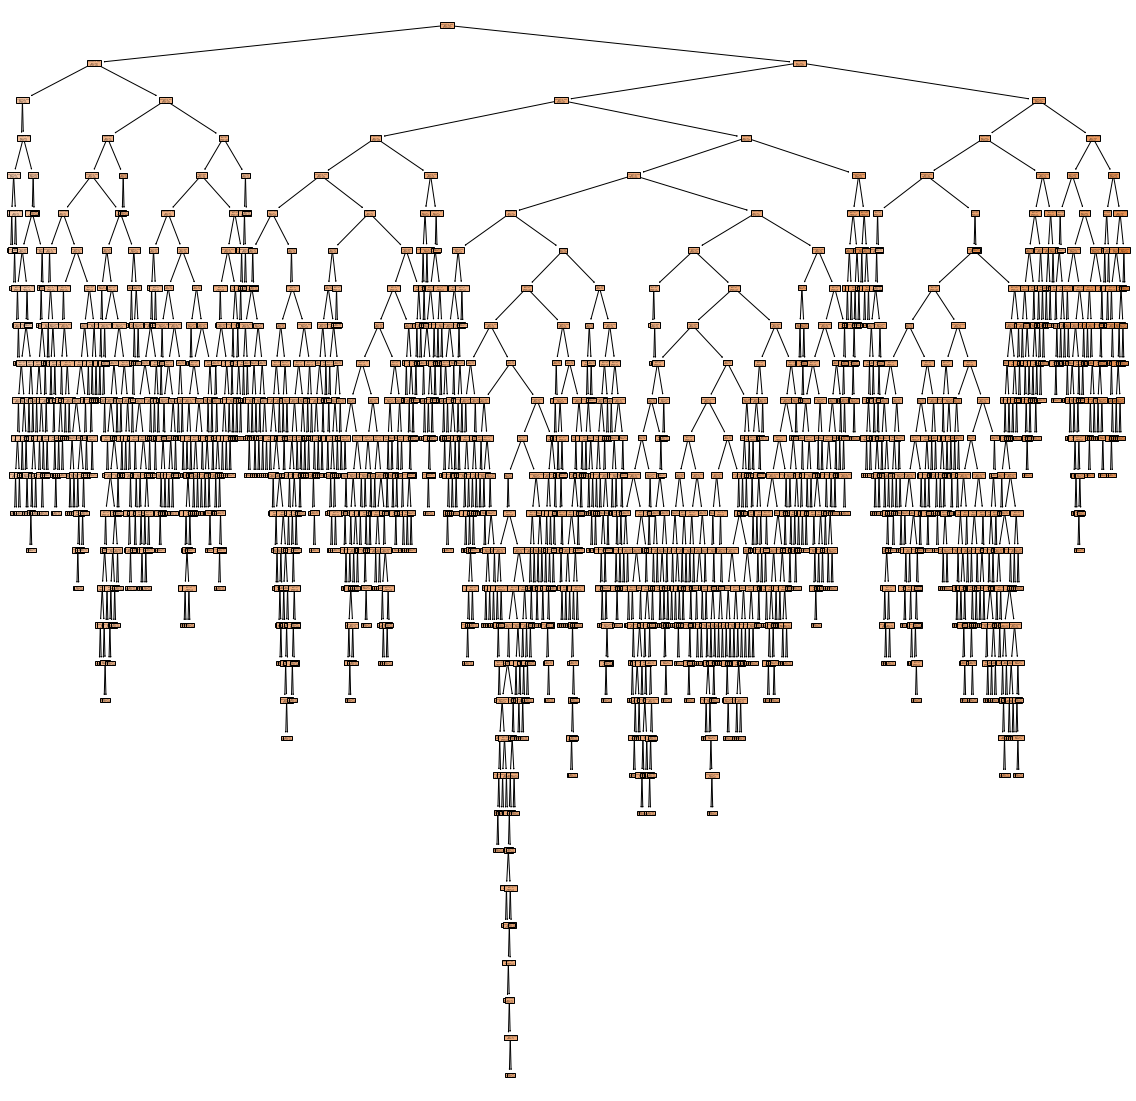

In [401]:
#representation de l'arbre
plt.figure(figsize=(20,20))
plot_tree(modelTree,feature_names =['Indice Marché', 'Size', 'Momentum', 'Volatilité', 'CAC40', 'SP500', 'Euro Stoxx 50', 'VIX'],filled=True)

#### Reglages

In [50]:
reg_decision_model=DecisionTreeRegressor(random_state=0)

* Recherche des parametres

In [51]:
parameters={
            "max_depth" : [5,7,9,11],
           "min_samples_leaf":[2,3,6],
           "min_weight_fraction_leaf":[0.01,0.02,0.03,0.04],
           "max_features":["auto",None],
           "max_leaf_nodes":[30,35,40,45] }

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

tuning_model=GridSearchCV(reg_decision_model,parameters,scoring='r2')

DataTrain=DataSet.loc[:int(len(DataSet.index)*0.7),:]
X,Y=Sep(DataTrain,'Ethereum',False)

tuning_model.fit(X,Y)
tuning_model.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': 35,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.02}

On fait n combinaisons possibles de d'hyperparametres avec RandomizedSearchcv et ca nous sort ces meilleurs para. On a ensuite affine pour vraiment trouver la meilleure combi avec Greadsearchcv

* Creation modèle avec les paramètres sélectionnées

In [52]:
modelTree2=DecisionTreeRegressor(min_weight_fraction_leaf=0.02,min_samples_leaf=2,max_leaf_nodes=35,max_features='auto',max_depth=9)

* Lancements modèles sur BTC et ETH

In [53]:
evaluationML(DataSet,'Ethereum',modelTree2,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 2.12992, 'MAE (%)': 1.29656, 'MSE (%)': 0.04537, 'R2': 0.81654}
Stats val
La performance du modèle
{'RMSE (%)': 3.66773, 'MAE (%)': 2.55386, 'MSE (%)': 0.13452, 'R2': 0.62645}
Stats Test
La performance du modèle
{'RMSE (%)': 1.92843, 'MAE (%)': 1.41521, 'MSE (%)': 0.03719, 'R2': 0.76708}


([3.66773, 2.55386, 0.13452, 0.62645], [1.92843, 1.41521, 0.03719, 0.76708])

In [54]:
evaluationML(DataSet,'Bitcoin',modelTree2,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 1.87678, 'MAE (%)': 1.13165, 'MSE (%)': 0.03522, 'R2': 0.76646}
Stats val
La performance du modèle
{'RMSE (%)': 2.4052, 'MAE (%)': 1.74992, 'MSE (%)': 0.05785, 'R2': 0.71142}
Stats Test
La performance du modèle
{'RMSE (%)': 1.76265, 'MAE (%)': 1.22922, 'MSE (%)': 0.03107, 'R2': 0.73041}


([2.4052, 1.74992, 0.05785, 0.71142], [1.76265, 1.22922, 0.03107, 0.73041])

[Text(448.66216216216213, 1019.25, 'Indice Marché <= -0.021\nmse = 0.002\nsamples = 1099\nvalue = 0.002'),
 Text(120.64864864864865, 883.35, 'Indice Marché <= -0.076\nmse = 0.001\nsamples = 237\nvalue = -0.043'),
 Text(90.48648648648648, 747.45, 'mse = 0.003\nsamples = 42\nvalue = -0.097'),
 Text(150.8108108108108, 747.45, 'Indice Marché <= -0.04\nmse = 0.0\nsamples = 195\nvalue = -0.031'),
 Text(90.48648648648648, 611.55, 'Indice Marché <= -0.049\nmse = 0.0\nsamples = 91\nvalue = -0.043'),
 Text(60.32432432432432, 475.65, 'Volatilité <= 0.038\nmse = 0.0\nsamples = 57\nvalue = -0.046'),
 Text(30.16216216216216, 339.75, 'mse = 0.0\nsamples = 30\nvalue = -0.053'),
 Text(90.48648648648648, 339.75, 'mse = 0.0\nsamples = 27\nvalue = -0.038'),
 Text(120.64864864864865, 475.65, 'mse = 0.0\nsamples = 34\nvalue = -0.037'),
 Text(211.13513513513513, 611.55, 'Volatilité <= 0.023\nmse = 0.0\nsamples = 104\nvalue = -0.021'),
 Text(180.97297297297297, 475.65, 'Indice Marché <= -0.03\nmse = 0.0\nsamp

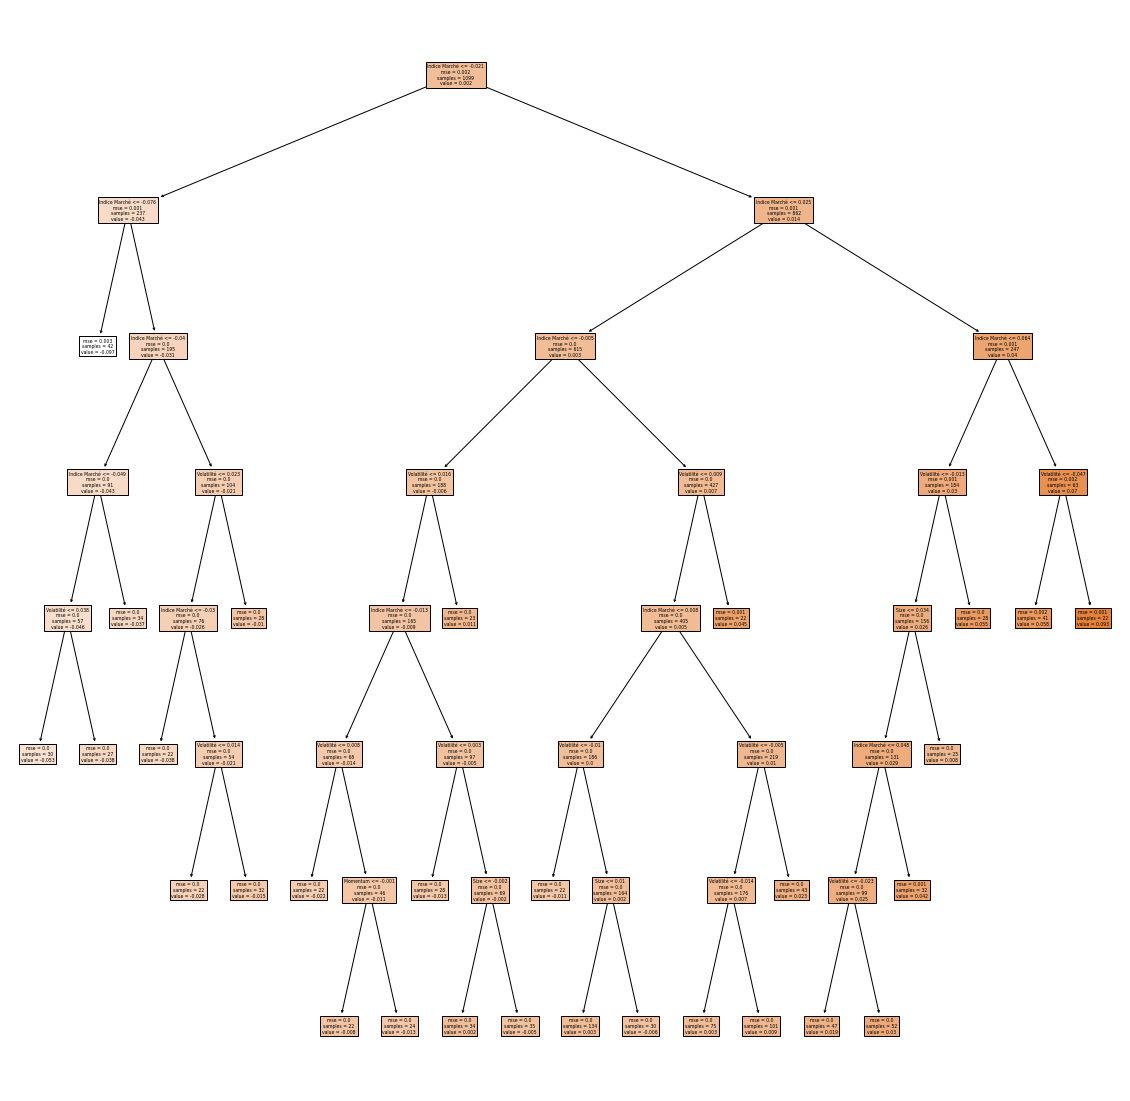

In [182]:
#Arbre
plt.figure(figsize=(20,20))
plot_tree(modelTree2,feature_names =['Indice Marché', 'Size', 'Momentum', 'Volatilité', 'CAC40', 'SP500', 'Euro Stoxx 50', 'VIX'],filled=True)

### 5. Random forest

#### Modele sans reglage

In [55]:
from sklearn.ensemble import RandomForestRegressor
modelRF=RandomForestRegressor(random_state=0)

print('Etherum')
evaluationML(DataSet,'Ethereum',modelRF,Test=True,Constru=False,Affiche=True,Graph=False)
print("")

print('Bitcoin')
evaluationML(DataSet,'Bitcoin',modelRF,Test=True,Constru=False,Affiche=True,Graph=False)

Etherum
Stats Train
La performance du modèle
{'RMSE (%)': 0.8416, 'MAE (%)': 0.50763, 'MSE (%)': 0.00708, 'R2': 0.97136}
Stats val
La performance du modèle
{'RMSE (%)': 3.48056, 'MAE (%)': 2.4763, 'MSE (%)': 0.12114, 'R2': 0.6636}
Stats Test
La performance du modèle
{'RMSE (%)': 1.69213, 'MAE (%)': 1.29809, 'MSE (%)': 0.02863, 'R2': 0.82067}

Bitcoin
Stats Train
La performance du modèle
{'RMSE (%)': 0.64905, 'MAE (%)': 0.38364, 'MSE (%)': 0.00421, 'R2': 0.97207}
Stats val
La performance du modèle
{'RMSE (%)': 2.05016, 'MAE (%)': 1.46901, 'MSE (%)': 0.04203, 'R2': 0.79033}
Stats Test
La performance du modèle
{'RMSE (%)': 1.27982, 'MAE (%)': 0.89752, 'MSE (%)': 0.01638, 'R2': 0.85788}


([2.05016, 1.46901, 0.04203, 0.79033], [1.27982, 0.89752, 0.01638, 0.85788])

#### Regelages

* Recherche des parametres

In [56]:
modelRF=RandomForestRegressor(min_weight_fraction_leaf=0.00,min_samples_leaf=2,max_leaf_nodes=35,max_features='auto',max_depth=7,random_state=0)

In [57]:
parameters={'n_estimators':[200,250,150]}

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

tuning_model=GridSearchCV(modelRF,parameters,scoring='r2')

DataTrain=DataSet.loc[:int(len(DataSet.index)*0.7),:]
X,Y=Sep(DataTrain,'Ethereum',False)

tuning_model.fit(X,Y)
tuning_model.best_params_

{'n_estimators': 200}

* Creation modèle avec les paramètres sélectionnées

In [58]:
modelRF=RandomForestRegressor(min_weight_fraction_leaf=0.00,min_samples_leaf=1,max_leaf_nodes=35,max_features='auto',max_depth=7,n_estimators=150,random_state=0)

* Lancements modèles sur BTC et ETH

In [59]:
evaluationML(DataSet,'Ethereum',modelRF,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 1.47207, 'MAE (%)': 1.03428, 'MSE (%)': 0.02167, 'R2': 0.91236}
Stats val
La performance du modèle
{'RMSE (%)': 3.49459, 'MAE (%)': 2.44295, 'MSE (%)': 0.12212, 'R2': 0.66088}
Stats Test
La performance du modèle
{'RMSE (%)': 1.67798, 'MAE (%)': 1.28256, 'MSE (%)': 0.02816, 'R2': 0.82365}


([3.49459, 2.44295, 0.12212, 0.66088], [1.67798, 1.28256, 0.02816, 0.82365])

In [60]:
evaluationML(DataSet,'Bitcoin',modelRF,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 1.2299, 'MAE (%)': 0.89696, 'MSE (%)': 0.01513, 'R2': 0.89971}
Stats val
La performance du modèle
{'RMSE (%)': 2.24989, 'MAE (%)': 1.6974, 'MSE (%)': 0.05062, 'R2': 0.74749}
Stats Test
La performance du modèle
{'RMSE (%)': 1.48312, 'MAE (%)': 1.076, 'MSE (%)': 0.022, 'R2': 0.80914}


([2.24989, 1.6974, 0.05062, 0.74749], [1.48312, 1.076, 0.022, 0.80914])

### 6.Modele SVR (support vector regression)

In [33]:
from sklearn.svm import LinearSVR

#### Modele sans reglages

In [34]:
modelSVR=LinearSVR(random_state=42)

In [35]:
evaluationML(DataSet,'Ethereum',modelSVR,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 1.88413, 'MAE (%)': 1.17776, 'MSE (%)': 0.0355, 'R2': 0.85644}
Stats val
La performance du modèle
{'RMSE (%)': 3.34121, 'MAE (%)': 2.37719, 'MSE (%)': 0.11164, 'R2': 0.69}
Stats Test
La performance du modèle
{'RMSE (%)': 1.5644, 'MAE (%)': 1.19653, 'MSE (%)': 0.02447, 'R2': 0.84672}


([3.34121, 2.37719, 0.11164, 0.69], [1.5644, 1.19653, 0.02447, 0.84672])

In [36]:
evaluationML(DataSet,'Bitcoin',modelSVR,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 0.98955, 'MAE (%)': 0.66092, 'MSE (%)': 0.00979, 'R2': 0.93508}
Stats val
La performance du modèle
{'RMSE (%)': 1.22154, 'MAE (%)': 0.89848, 'MSE (%)': 0.01492, 'R2': 0.92556}
Stats Test
La performance du modèle
{'RMSE (%)': 0.80038, 'MAE (%)': 0.57894, 'MSE (%)': 0.00641, 'R2': 0.94441}


([1.22154, 0.89848, 0.01492, 0.92556], [0.80038, 0.57894, 0.00641, 0.94441])

#### Reglages

* Recherche des parametres

In [37]:
modelSVR=LinearSVR(random_state=42)
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters={
    'C':[4.5,5,5.5],
    'epsilon':[0.001,0.002,0.003],
    'max_iter':[500,1000,1500,2000],
}



tuning_model=GridSearchCV(modelSVR,parameters,scoring='r2')

DataTrain=DataSet.loc[:int(len(DataSet.index)*0.7),:]
X,Y=Sep(DataTrain,'Ethereum',False)


tuning_model.fit(X,Y)
tuning_model.best_params_

{'C': 4.5, 'epsilon': 0.001, 'max_iter': 2000}

* Creation modèle avec les paramètres sélectionnées

In [199]:
ModelSVR2=LinearSVR(C=4.5,epsilon=0.001,max_iter=2000,random_state=42)

* Lancements modèles sur BTC et ETH

In [200]:
evaluationML(DataSet,'Ethereum',ModelSVR2,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 1.87156, 'MAE (%)': 1.16615, 'MSE (%)': 0.03503, 'R2': 0.85834}
Stats val
La performance du modèle
{'RMSE (%)': 3.28196, 'MAE (%)': 2.36376, 'MSE (%)': 0.10771, 'R2': 0.70089}
Stats Test
La performance du modèle
{'RMSE (%)': 1.53973, 'MAE (%)': 1.16892, 'MSE (%)': 0.02371, 'R2': 0.85151}


([3.28196, 2.36376, 0.10771, 0.70089], [1.53973, 1.16892, 0.02371, 0.85151])

In [195]:
ModelSVR2.coef_

array([ 1.22069359, -0.30057213,  0.20448486,  0.20332433, -0.01116813,
        0.09705871, -0.04189564,  0.00974212])

In [201]:
ModelSVR2.intercept_

array([-0.00046015])

In [196]:
ModelSVR2=LinearSVR(C=5,epsilon=0.001,max_iter=1500,random_state=2)

In [197]:
evaluationML(DataSet,'Bitcoin',ModelSVR2,Test=True,Constru=False,Affiche=True,Graph=False)
ModelSVR2.coef_

Stats Train
La performance du modèle
{'RMSE (%)': 0.77231, 'MAE (%)': 0.51631, 'MSE (%)': 0.00596, 'R2': 0.96045}
Stats val
La performance du modèle
{'RMSE (%)': 0.94077, 'MAE (%)': 0.62326, 'MSE (%)': 0.00885, 'R2': 0.95585}
Stats Test
La performance du modèle
{'RMSE (%)': 0.57306, 'MAE (%)': 0.4071, 'MSE (%)': 0.00328, 'R2': 0.97151}


array([ 2.60538602, -0.58227512, -0.5980633 ,  2.25084164,  0.05862436,
        0.01097944, -0.05526156,  0.00442717])

### 7. Deep Learning

In [69]:
from sklearn.neural_network import MLPRegressor

In [70]:
model_MLP=MLPRegressor(random_state=0)

#### Modele sans reglages

In [71]:
evaluationML(DataSet,'Ethereum',model_MLP,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 2.02885, 'MAE (%)': 1.34102, 'MSE (%)': 0.04116, 'R2': 0.83353}
Stats val
La performance du modèle
{'RMSE (%)': 3.59978, 'MAE (%)': 2.50643, 'MSE (%)': 0.12958, 'R2': 0.64016}
Stats Test
La performance du modèle
{'RMSE (%)': 1.79944, 'MAE (%)': 1.36867, 'MSE (%)': 0.03238, 'R2': 0.7972}


([3.59978, 2.50643, 0.12958, 0.64016], [1.79944, 1.36867, 0.03238, 0.7972])

In [72]:
evaluationML(DataSet,'Bitcoin',model_MLP,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 2.27375, 'MAE (%)': 1.57254, 'MSE (%)': 0.0517, 'R2': 0.65722}
Stats val
La performance du modèle
{'RMSE (%)': 3.09796, 'MAE (%)': 2.33642, 'MSE (%)': 0.09597, 'R2': 0.52124}
Stats Test
La performance du modèle
{'RMSE (%)': 1.85461, 'MAE (%)': 1.40568, 'MSE (%)': 0.0344, 'R2': 0.70155}


([3.09796, 2.33642, 0.09597, 0.52124], [1.85461, 1.40568, 0.0344, 0.70155])

#### Modele avec reglages

In [73]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters= {'hidden_layer_sizes':[(200,150,100),(250,200,150),(250,300,350)],
            'max_iter':[100,200,300],
             'validation_fraction':[0.1,0.3],
             'n_iter_no_change':[70,80,100],
             'beta_1':[0.7,0.9],

             
             
            }


tuning_model=RandomizedSearchCV(model_MLP,parameters,scoring='r2',n_iter=20)

DataTrain=DataSet.loc[:int(len(DataSet.index)*0.7),:]
X,Y=Sep(DataTrain,'Ethereum',False)


tuning_model.fit(X,Y)
tuning_model.best_params_

C:\Users\cyril\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\sklearn\neural_network\_multi

{'validation_fraction': 0.1,
 'n_iter_no_change': 70,
 'max_iter': 200,
 'hidden_layer_sizes': (250, 300, 350),
 'beta_1': 0.9}

In [79]:
model_MLP=MLPRegressor(hidden_layer_sizes=(250,200,150),max_iter=100,n_iter_no_change=80,random_state=0)

In [80]:
evaluationML(DataSet,'Ethereum',model_MLP,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 1.83127, 'MAE (%)': 1.22814, 'MSE (%)': 0.03354, 'R2': 0.86438}
Stats val
La performance du modèle
{'RMSE (%)': 3.34607, 'MAE (%)': 2.40282, 'MSE (%)': 0.11196, 'R2': 0.68909}
Stats Test
La performance du modèle
{'RMSE (%)': 1.59805, 'MAE (%)': 1.2272, 'MSE (%)': 0.02554, 'R2': 0.84005}


([3.34607, 2.40282, 0.11196, 0.68909], [1.59805, 1.2272, 0.02554, 0.84005])

In [76]:
evaluationML(DataSet,'Bitcoin',model_MLP,Test=True,Constru=False,Affiche=True,Graph=False)

Stats Train
La performance du modèle
{'RMSE (%)': 0.69672, 'MAE (%)': 0.50237, 'MSE (%)': 0.00485, 'R2': 0.96782}
Stats val
La performance du modèle
{'RMSE (%)': 0.94526, 'MAE (%)': 0.63044, 'MSE (%)': 0.00894, 'R2': 0.95543}
Stats Test
La performance du modèle
{'RMSE (%)': 0.56155, 'MAE (%)': 0.40201, 'MSE (%)': 0.00315, 'R2': 0.97264}


([0.94526, 0.63044, 0.00894, 0.95543], [0.56155, 0.40201, 0.00315, 0.97264])

### 9. Modeles Bosting (Non expliqué mais pour tester si meilleurs résultats)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

#### a. AdaBoost 

##### sans reglages

In [83]:
from sklearn.ensemble import AdaBoostRegressor
modelAda=AdaBoostRegressor()
evaluationML(DataSet,'Ethereum',modelAda,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 2.00558, 'MAE (%)': 1.51137, 'MSE (%)': 0.04022, 'R2': 0.83733}
Stats val
La performance du modèle
{'RMSE (%)': 3.73096, 'MAE (%)': 2.67313, 'MSE (%)': 0.1392, 'R2': 0.61345}
Stats Test
La performance du modèle
{'RMSE (%)': 2.01203, 'MAE (%)': 1.52644, 'MSE (%)': 0.04048, 'R2': 0.74645}


([3.73096, 2.67313, 0.1392, 0.61345], [2.01203, 1.52644, 0.04048, 0.74645])

In [84]:
evaluationML(DataSet,'Bitcoin',modelAda,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 1.77437, 'MAE (%)': 1.36877, 'MSE (%)': 0.03148, 'R2': 0.79125}
Stats val
La performance du modèle
{'RMSE (%)': 2.67018, 'MAE (%)': 2.0985, 'MSE (%)': 0.0713, 'R2': 0.64433}
Stats Test
La performance du modèle
{'RMSE (%)': 1.76547, 'MAE (%)': 1.3561, 'MSE (%)': 0.03117, 'R2': 0.72955}


([2.67018, 2.0985, 0.0713, 0.64433], [1.76547, 1.3561, 0.03117, 0.72955])

##### avec reglages

In [85]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters={
    'n_estimators':[100,150,170,190],
    "learning_rate":[0.05,0.1,1.0],

    
}


tuning_model=GridSearchCV(modelAda,parameters,scoring='r2')

DataTrain=DataSet.loc[:int(len(DataSet.index)*0.7),:]
X,Y=Sep(DataTrain,'Ethereum',False)


tuning_model.fit(X,Y)
tuning_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 170}

In [86]:
modelAda2=AdaBoostRegressor(learning_rate=0.1,n_estimators=170)

In [87]:
evaluationML(DataSet,'Ethereum',modelAda2,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 2.00535, 'MAE (%)': 1.47461, 'MSE (%)': 0.04021, 'R2': 0.83737}
Stats val
La performance du modèle
{'RMSE (%)': 3.62879, 'MAE (%)': 2.62778, 'MSE (%)': 0.13168, 'R2': 0.63434}
Stats Test
La performance du modèle
{'RMSE (%)': 1.91169, 'MAE (%)': 1.43763, 'MSE (%)': 0.03655, 'R2': 0.77111}


([3.62879, 2.62778, 0.13168, 0.63434], [1.91169, 1.43763, 0.03655, 0.77111])

In [88]:
evaluationML(DataSet,'Bitcoin',modelAda2,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 1.87936, 'MAE (%)': 1.42645, 'MSE (%)': 0.03532, 'R2': 0.76582}
Stats val
La performance du modèle
{'RMSE (%)': 2.70861, 'MAE (%)': 2.12842, 'MSE (%)': 0.07337, 'R2': 0.63402}
Stats Test
La performance du modèle
{'RMSE (%)': 1.81457, 'MAE (%)': 1.38618, 'MSE (%)': 0.03293, 'R2': 0.7143}


([2.70861, 2.12842, 0.07337, 0.63402], [1.81457, 1.38618, 0.03293, 0.7143])

#### b. Gradient Boosting

http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/gradient_boosting.html

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
* https://eric.univ-lyon2.fr/~ricco/cours/slides/gradient_boosting.pdf

##### sans parametres

In [217]:
from sklearn.ensemble import GradientBoostingRegressor
modelGB = GradientBoostingRegressor()

In [218]:
evaluationML(DataSet,'Ethereum',modelGB,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 1.27785, 'MAE (%)': 0.89535, 'MSE (%)': 0.01633, 'R2': 0.93409}
Stats val
La performance du modèle
{'RMSE (%)': 3.78309, 'MAE (%)': 2.50506, 'MSE (%)': 0.14312, 'R2': 0.5975}
Stats Test
La performance du modèle
{'RMSE (%)': 1.68966, 'MAE (%)': 1.29013, 'MSE (%)': 0.02855, 'R2': 0.82889}


([3.78309, 2.50506, 0.14312, 0.5975], [1.68966, 1.29013, 0.02855, 0.82889])

In [219]:
evaluationML(DataSet,'Bitcoin',modelGB,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 0.939, 'MAE (%)': 0.71094, 'MSE (%)': 0.00882, 'R2': 0.94149}
Stats val
La performance du modèle
{'RMSE (%)': 2.12815, 'MAE (%)': 1.61684, 'MSE (%)': 0.04529, 'R2': 0.77657}
Stats Test
La performance du modèle
{'RMSE (%)': 1.35932, 'MAE (%)': 0.99095, 'MSE (%)': 0.01848, 'R2': 0.84065}


([2.12815, 1.61684, 0.04529, 0.77657], [1.35932, 0.99095, 0.01848, 0.84065])

##### avec parametres

In [300]:
modelGB2=GradientBoostingRegressor(
  max_depth=3,subsample=0.8,learning_rate=0.05,n_estimators=60,max_leaf_nodes=30)

In [324]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
parameters= {'validation_fraction':[0.05,0.1,0.2]}


tuning_model=GridSearchCV(modelGB,parameters,scoring='r2')

DataTrain=DataSet.loc[:int(len(DataSet.index)*0.7),:]
X,Y=Sep(DataTrain,'Ethereum',False)


tuning_model.fit(X,Y)
tuning_model.best_params_

{'validation_fraction': 0.05}

In [365]:
modelGB2=GradientBoostingRegressor(
    max_depth=2,subsample=1.0,learning_rate=0.05,n_estimators=60,max_leaf_nodes=50)

In [366]:
evaluationML(DataSet,'Ethereum',modelGB2,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 1.95615, 'MAE (%)': 1.27447, 'MSE (%)': 0.03827, 'R2': 0.84555}
Stats val
La performance du modèle
{'RMSE (%)': 3.40714, 'MAE (%)': 2.37426, 'MSE (%)': 0.11609, 'R2': 0.67352}
Stats Test
La performance du modèle
{'RMSE (%)': 1.82599, 'MAE (%)': 1.37171, 'MSE (%)': 0.03334, 'R2': 0.80017}


([3.40714, 2.37426, 0.11609, 0.67352], [1.82599, 1.37171, 0.03334, 0.80017])

In [367]:
evaluationML(DataSet,'Bitcoin',modelGB2,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 1.8496, 'MAE (%)': 1.27093, 'MSE (%)': 0.03421, 'R2': 0.77298}
Stats val
La performance du modèle
{'RMSE (%)': 2.55336, 'MAE (%)': 1.97518, 'MSE (%)': 0.0652, 'R2': 0.67836}
Stats Test
La performance du modèle
{'RMSE (%)': 1.7773, 'MAE (%)': 1.26401, 'MSE (%)': 0.03159, 'R2': 0.72758}


([2.55336, 1.97518, 0.0652, 0.67836], [1.7773, 1.26401, 0.03159, 0.72758])

#### c. XGBoost

pip install xgboost

In [91]:
from xgboost import XGBRegressor
modelXG=XGBRegressor(random_state=0)



In [92]:
evaluationML(DataSet,'Ethereum',modelXG,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 0.22684, 'MAE (%)': 0.15319, 'MSE (%)': 0.00051, 'R2': 0.99792}
Stats val
La performance du modèle
{'RMSE (%)': 3.91151, 'MAE (%)': 2.58523, 'MSE (%)': 0.153, 'R2': 0.57514}
Stats Test
La performance du modèle
{'RMSE (%)': 1.74278, 'MAE (%)': 1.34883, 'MSE (%)': 0.03037, 'R2': 0.80977}


([3.91151, 2.58523, 0.153, 0.57514], [1.74278, 1.34883, 0.03037, 0.80977])

In [93]:
evaluationML(DataSet,'Bitcoin',modelXG,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 0.1053, 'MAE (%)': 0.07435, 'MSE (%)': 0.00011, 'R2': 0.99926}
Stats val
La performance du modèle
{'RMSE (%)': 1.94635, 'MAE (%)': 1.37799, 'MSE (%)': 0.03788, 'R2': 0.81102}
Stats Test
La performance du modèle
{'RMSE (%)': 1.25168, 'MAE (%)': 0.82535, 'MSE (%)': 0.01567, 'R2': 0.86406}


([1.94635, 1.37799, 0.03788, 0.81102], [1.25168, 0.82535, 0.01567, 0.86406])

In [474]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

learning_rate = [round(float(x), 2) for x in np.linspace(start = .1, stop = .2, num = 11)]
    # Minimum for sum of weights for observations in a node
min_child_weight = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    # Maximum nodes in each tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
subsample=[0.3, 0.4,0.5,0.6, 0.7]


parameters= {'learning_rate': learning_rate,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,
                'subsample': subsample,
                'n_estimators':n_estimators
                }


tuning_model=RandomizedSearchCV(modelXG,parameters,scoring='r2',n_iter=10)

DataTrain=DataSet.loc[:int(len(DataSet.index)*0.7),:]
X,Y=Sep(DataTrain,'Ethereum',False)


tuning_model.fit(X,Y)
tuning_model.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 11,
 'max_depth': 9,
 'learning_rate': 0.14}

In [489]:
modelXG2=XGBRegressor(subsample=0.6,n_estimators=100,min_child_weight=11,max_depth=5,learning_rate=0.14)

In [490]:
evaluationML(DataSet,'Ethereum',modelXG2,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 1.46003, 'MAE (%)': 0.93088, 'MSE (%)': 0.02132, 'R2': 0.91379}
Stats val
La performance du modèle
{'RMSE (%)': 3.37204, 'MAE (%)': 2.42389, 'MSE (%)': 0.11371, 'R2': 0.68425}
Stats Test
La performance du modèle
{'RMSE (%)': 1.65124, 'MAE (%)': 1.25362, 'MSE (%)': 0.02727, 'R2': 0.82923}


([3.37204, 2.42389, 0.11371, 0.68425], [1.65124, 1.25362, 0.02727, 0.82923])

In [491]:
evaluationML(DataSet,'Bitcoin',modelXG2,Test=True,Constru=False,Affiche=True)

Stats Train
La performance du modèle
{'RMSE (%)': 1.05086, 'MAE (%)': 0.65247, 'MSE (%)': 0.01104, 'R2': 0.92678}
Stats val
La performance du modèle
{'RMSE (%)': 1.90709, 'MAE (%)': 1.41612, 'MSE (%)': 0.03637, 'R2': 0.81857}
Stats Test
La performance du modèle
{'RMSE (%)': 1.34129, 'MAE (%)': 0.93626, 'MSE (%)': 0.01799, 'R2': 0.8439}


([1.90709, 1.41612, 0.03637, 0.81857], [1.34129, 0.93626, 0.01799, 0.8439])